# GEOPANDAS

In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
fp = os.path.join('week4-data', 'gbif_sus_scrofa_california.shp')
fp

'week4-data/gbif_sus_scrofa_california.shp'

In [5]:
pigs = gpd.read_file(fp)

In [6]:
cal = os.path.join('week4-data', 'ca_state_boundary.shp')

In [7]:
cali = gpd.read_file(cal)

In [8]:
pigs.head()

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


In [9]:
# Check object

print(type(pigs))

# check object geom col
print(type(pigs.geometry))

# check object species
print(type(pigs.species))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


In [11]:
# Check data type of geom col- reflected when look. at dtpes in each col

In [12]:
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

In [13]:
# check geom type of each att in each col

In [14]:
pigs.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1041    Point
1042    Point
1043    Point
1044    Point
1045    Point
Length: 1046, dtype: object

## Check in

What is geom tye of the single feature of the CA stat boundary =? W=and Why does it make snese to have this kind of geom?

In [15]:
print(type(cali))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [17]:
cali.geom_type

0    MultiPolygon
dtype: object

## CRS and extent

In [18]:
# Accesss the CRS of the gPD coordinate ref system
# we can think of the crs as instructions to locate each spatial feature of our df
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
# Get more info aout hte CRS

print('ellipsoid:',pigs.crs.ellipsoid)
print('datum: ',pigs.crs.datum)
print('is geographic ?:',pigs.crs.is_geographic)
print('is projected ?:',pigs.crs.is_projected)

ellipsoid: WGS 84
datum:  World Geodetic System 1984 ensemble
is geographic ?: True
is projected ?: False


- what are the ellipsoid and the datum? What are they telling us about CRS?
- What does it mean that the CRS is geographic and not projectd?

The extent of the feodataframe is the bouding box covering all the spatial feaures in our go df.

This is formed by finding the points that are furthest west, eat,south and north

In [23]:
#obtain the geo exten of the df
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

In [24]:
print("CRS:", cali.crs)

CRS: epsg:4326


## Data wrangling

Since geopd is built on top of pandas, we may use everything we have learned about data selection, wrangling, and modiication for pandas,df to wrangle geo dataframes.

Example we only want to use recent dat for wild pig observations.


In [26]:
# examin pig obs per year
pigs.year.value_counts().sort_index()

1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: year, Length: 61, dtype: int64

In [29]:
# Select data from 2020 onwards
pigs_recent = pigs[pigs.year>=2020]

# check length of og df
print('total um of obvs', len(pigs))

# cehck len of new df
print('num of new obvs since 2020:',len(pigs_recent))

total um of obvs 1046
num of new obvs since 2020: 606


## Create a map


geo df also have a plot() method that we can call directly for a qick map

To crate a black figure:


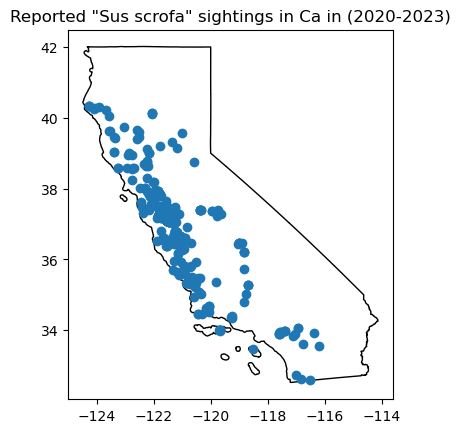

In [36]:
# init empty figure (fig) and axes (ax)
fig,ax = plt.subplots()


# add Ca boundary
cali.plot(ax=ax,
         color = 'none',
         edgecolor='black')

# Add pigs point plot to oour fdures axis
pigs_recent.plot(ax=ax)

# custom
ax.set_title('Reported "Sus scrofa" sightings in Ca in (2020-2023)')

#Display the fig
plt.show()